In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk as erk
import numpy as np
import pandas as pd

hfi = erk.get_hfi_returns()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
erk.var_gaussian(hfi['2000':], level=1, modified=False)["Distressed Securities"]

0.03143017693928047

In [113]:
erk.var_gaussian(hfi['2000':], level=1, modified=True)["Distressed Securities"]

0.04966909110627918

In [112]:
erk.var_historic(hfi['2000':], level=1)["Distressed Securities"]

0.04264199999999999

In [106]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["2013":"2017"],12)
cov = ind["2013":"2017"].cov()

In [81]:
l=["Books","Steel","Oil","Mines"]

In [51]:
er[l]

Books    0.095312
Steel    0.100716
Oil      0.025275
Mines    0.005136
dtype: float64

In [52]:
rf=0.1

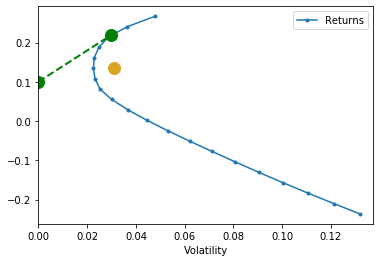

In [20]:
erk.plot_ef(20,er,cov,show_cml=True,riskfree_rate=rf,show_ew=True,show_gmv=False)

In [53]:
n = er[l].shape[0]
w_ew = np.repeat(1/n,n)
r_ew = erk.portfolio_return(w_ew,er[l])

In [54]:
l

['Books', 'Steel', 'Oil', 'Mines']

In [55]:
w_ew

array([0.25, 0.25, 0.25, 0.25])

In [77]:
w_mrs = erk.msr(rf, er[l], cov.loc[l,l])
w_mrs

array([0.00000000e+00, 1.00000000e+00, 6.00214323e-16, 7.35522754e-16])

In [57]:
q8 = (list(erk.gmv(cov.loc[l,l])))
q8

[0.47702486486118073,
 4.336808689942018e-19,
 0.43411203030180473,
 0.08886310483701454]

In [108]:
covmat = ind.loc["2018"][l].cov()
covmat

,Books,Steel,Oil,Mines
Books,0.002799,0.002098,0.002558,0.001629
Steel,0.002098,0.004027,0.003473,0.001843
Oil,0.002558,0.003473,0.005296,0.001961
Mines,0.001629,0.001843,0.001961,0.002059


In [109]:
vol_mrs = erk.portfolio_vol(erk.msr(rf, er[l], cov.loc[l,l]),covmat)*12**0.5
vol_mrs

0.21983988181484201

In [105]:
vol_gmv = erk.portfolio_vol(erk.gmv(ind.loc["2013":"2017"][l].cov()), covmat)*12**0.5
vol_gmv

0.18973734554913554